In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("supermarket_sales -.csv")



In [ ]:
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
data.shape


(1000, 17)

In [ ]:
data.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#التحقق من القيم المفقودة

In [ ]:
data.isnull().sum()


,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
data.duplicated().sum()

np.int64(0)

#تحليل الأعمدة

In [ ]:
data.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


value counts


In [ ]:
print(data['Branch'].value_counts())
print(data['City'].value_counts())
print(data['Customer type'].value_counts())
print(data['Gender'].value_counts())
print(data['Payment'].value_counts())


Branch
A    340
B    332
C    328
Name: count, dtype: int64
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
Customer type
Member    501
Normal    499
Name: count, dtype: int64
Gender
Female    501
Male      499
Name: count, dtype: int64
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


#تحليل المبيعات والأرباح والضرائب



In [ ]:
total_sales = data['Total'].sum()
total_tax = data['Tax 5%'].sum()
total_income = data['gross income'].sum()

print("Total Sales:", total_sales)
print("Total Tax:", total_tax)
print("Total Profit:", total_income)


Total Sales: 322966.749
Total Tax: 15379.368999999999
Total Profit: 15379.368999999999


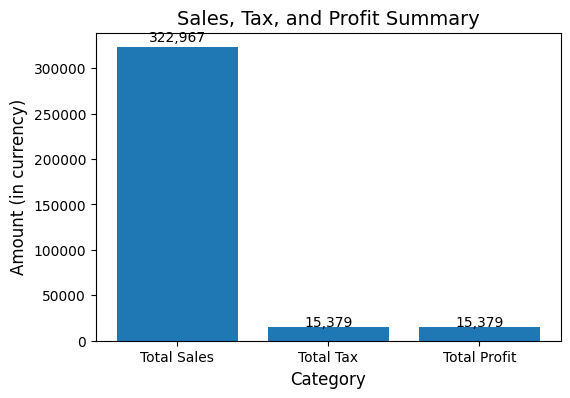

In [ ]:
labels = ['Total Sales', 'Total Tax', 'Total Profit']
values = [total_sales, total_tax, total_income]
plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title('Sales, Tax, and Profit Summary', fontsize=14)
plt.ylabel('Amount (in currency)', fontsize=12)
plt.xlabel('Category', fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v + (v * 0.02), f"{v:,.0f}", ha='center', fontsize=10)

plt.show()


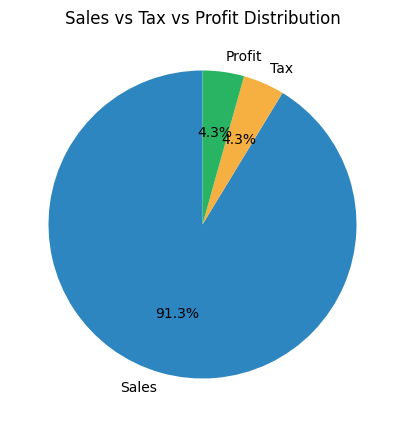

In [ ]:
labels = ['Sales', 'Tax', 'Profit']
values = [total_sales, total_tax, total_income]
colors = ['#2E86C1', '#F5B041', '#28B463']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sales vs Tax vs Profit Distribution')
plt.show()


In [ ]:
profit_margin = total_income / total_sales * 100
tax_rate = total_tax / total_sales * 100

print(f"Profit Margin: {profit_margin:.2f}%")
print(f"Tax Rate: {tax_rate:.2f}%")


Profit Margin: 4.76%
Tax Rate: 4.76%


هامش الربح طبيعي ويعكس استقرار السوق، بينما معدل الضريبة ثابت.

#المبيعات حسب المدينة أو الفرع

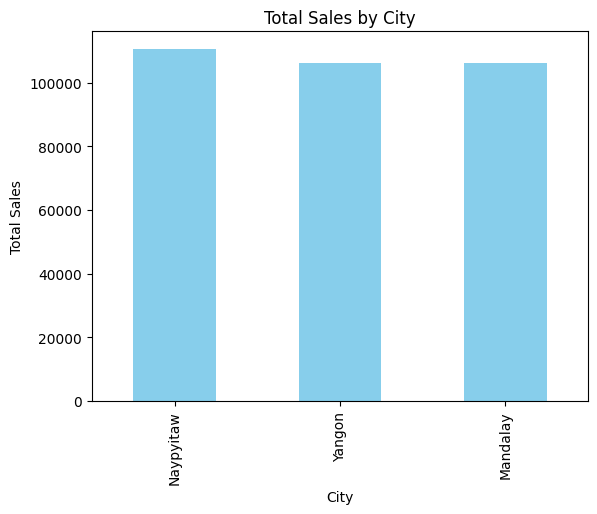

In [ ]:
data.groupby('City')['Total'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.show()


يشير هذا إلى أن نشاط المبيعات موزّع بشكل متوازن تقريبًا بين المدن الثلاث،
مع تفوق طفيف لفرع نايبتاي مما قد يعكس حجم الطلب أو عدد الزبائن الأكبر في تلك المنطقة.

#تحليل الوقت (يومي / أسبوعي / شهري)

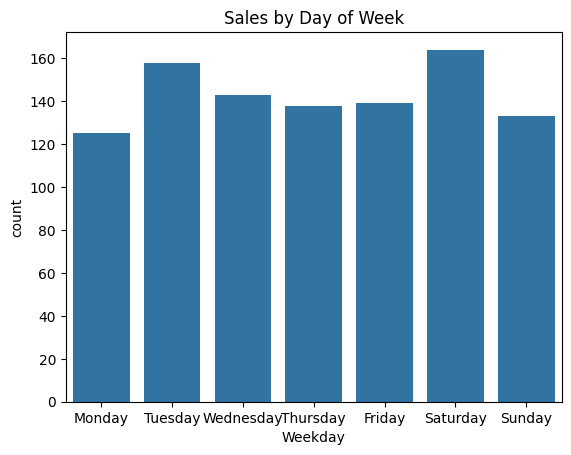

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()
data['Weekday'] = data['Date'].dt.day_name()

sns.countplot(x='Weekday', data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Sales by Day of Week")
plt.show()


يُظهر هذا التحليل توزيع المبيعات حسب أيام الأسبوع.
من خلال الرسم نلاحظ الأيام التي تشهد أعلى عدد من العمليات الشرائية،
مما يساعد في تحديد أيام الذروة وتخطيط الموارد أو العروض الخاصة وفقًا لها.

#تحليل المبيعات حسب الساعة أو اليوم

/tmp/ipython-input-2852678511.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time']).dt.hour


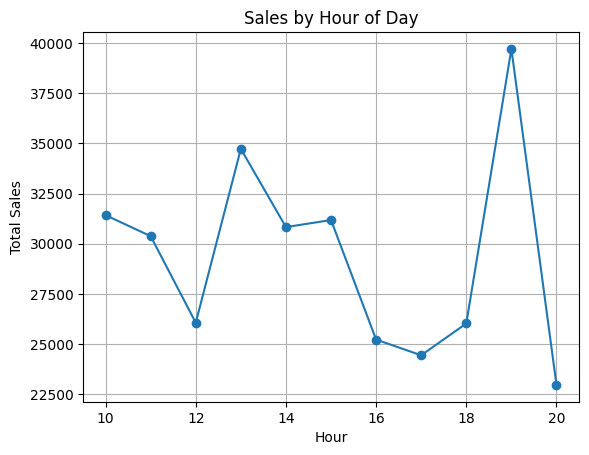

In [ ]:
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
data.groupby('Hour')['Total'].sum().plot(kind='line', marker='o')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


يُوضّح هذا التحليل إجمالي المبيعات حسب ساعات اليوم.
يُظهر الرسم ساعات النشاط الأعلى في المتجر،
مما يساعد في تحديد فترات الذروة اليومية لتنظيم دوام الموظفين وتحسين خدمة العملاء.

#تحليل طريقة الدفع


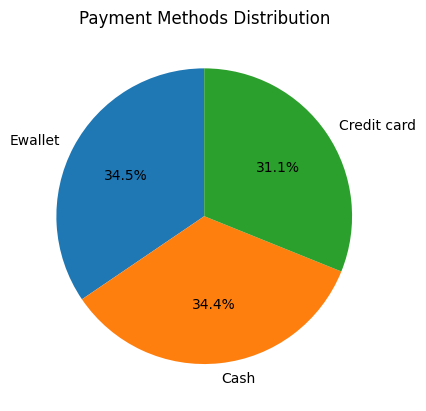

In [ ]:
data['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Payment Methods Distribution')
plt.ylabel('')
plt.show()


يُظهر هذا الرسم التوزيع النسبي لطرق الدفع المستخدمة من قبل العملاء.
يُلاحظ من النسب أن بعض طرق الدفع مثل Ewallet أو Cash تُستخدم أكثر من غيرها،
مما يساعد في فهم سلوك العملاء المالي وتطوير خيارات الدفع المفضلة لديهم.

#المنتجات الأكثر مبيعًا

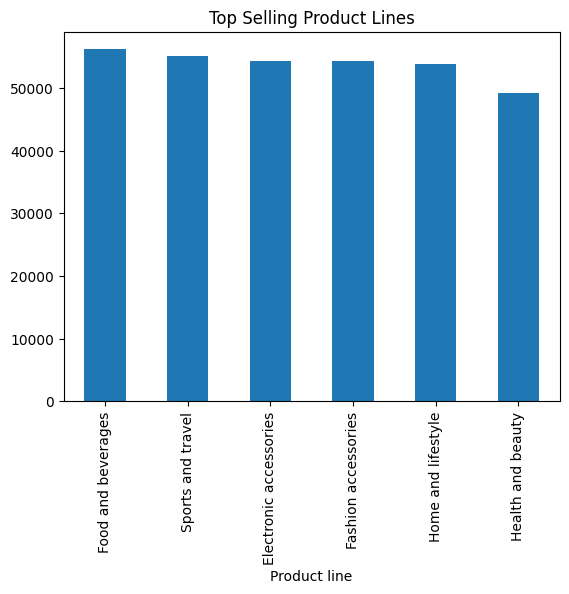

In [ ]:
top_products = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title='Top Selling Product Lines')
plt.show()


يُوضّح هذا التحليل أكثر خطوط المنتجات تحقيقًا للمبيعات.
يُظهر الرسم ترتيب الفئات من الأعلى إلى الأدنى،
مما يساعد في تحديد المنتجات الأكثر ربحية وشعبية لدى العملاء لتوجيه القرارات التسويقية والمخزنية.

#المبيعات حسب الفرع

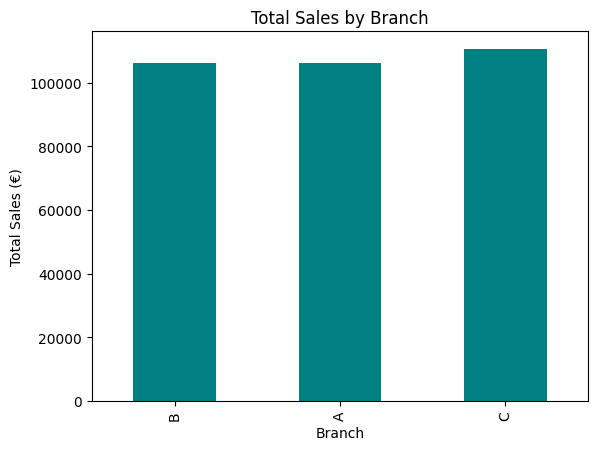

In [ ]:
data.groupby('Branch')['Total'].sum().sort_values().plot(kind='bar', color='teal')
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales (€)')
plt.show()


يُظهر هذا الرسم إجمالي المبيعات حسب كل فرع من فروع المتجر.
يُساعد التحليل في مقارنة أداء الفروع وتحديد الفرع الأكثر مبيعًا أو الذي يحتاج دعمًا تسويقيًا أكبر.

#تحليل الجنس  مقابل المبيعات  

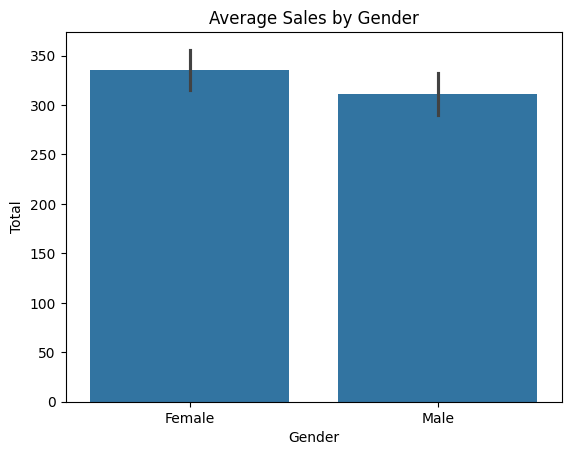

In [ ]:
sns.barplot(x='Gender', y='Total', data=data)
plt.title('Average Sales by Gender')
plt.show()


يُبيّن هذا التحليل متوسط المبيعات حسب جنس العميل.
يساعد في فهم الاختلافات في سلوك الشراء بين الرجال والنساء،
مما يمكن استخدامه في توجيه الحملات التسويقية بشكل أكثر فعالية.

#تحليل متوسط الربح لكل منتج

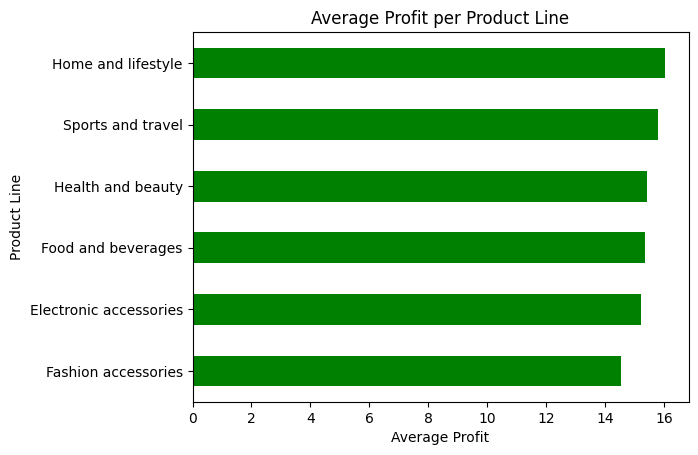

In [ ]:
data.groupby('Product line')['gross income'].mean().sort_values().plot(kind='barh', color='green')
plt.title('Average Profit per Product Line')
plt.xlabel('Average Profit')
plt.ylabel('Product Line')
plt.show()


يُوضّح هذا التحليل متوسط الأرباح لكل فئة من فئات المنتجات.
يساعد في تحديد المنتجات الأكثر ربحية بالنسبة للمتجر،
ويدعم قرارات التسعير وتوزيع الجهود التسويقية على الفئات الأعلى ربحًا.

#تحليل العلاقة بين نوع العميل والمبيعات

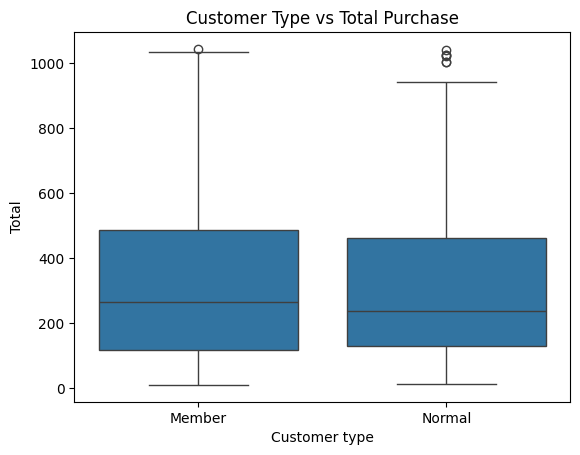

In [ ]:
sns.boxplot(x='Customer type', y='Total', data=data)
plt.title("Customer Type vs Total Purchase")
plt.show()


يُوضّح هذا الرسم العلاقة بين نوع العميل وإجمالي المشتريات.
يُظهر توزيع المبالغ التي ينفقها كل نوع من العملاء (Member / Normal)،
ويساعد في معرفة ما إذا كان الأعضاء ينفقون أكثر من العملاء العاديين.

#تقييم رضا العملاء

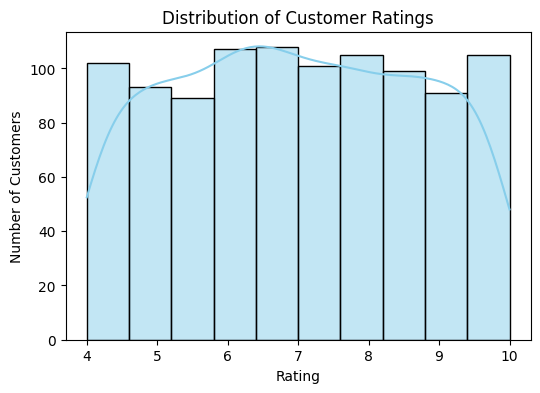

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=data,
    x='Rating',
    bins=10,
    color='skyblue',
    edgecolor='black',
    kde=True
)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')
plt.show()


يُظهر هذا الرسم توزيع تقييمات العملاء عبر جميع المعاملات.
من خلاله يمكن معرفة مدى رضا العملاء بشكل عام،
وملاحظة ما إذا كانت التقييمات تميل إلى القيم العالية أو المنخفضة.

#متوسط التقييم لكل منتج

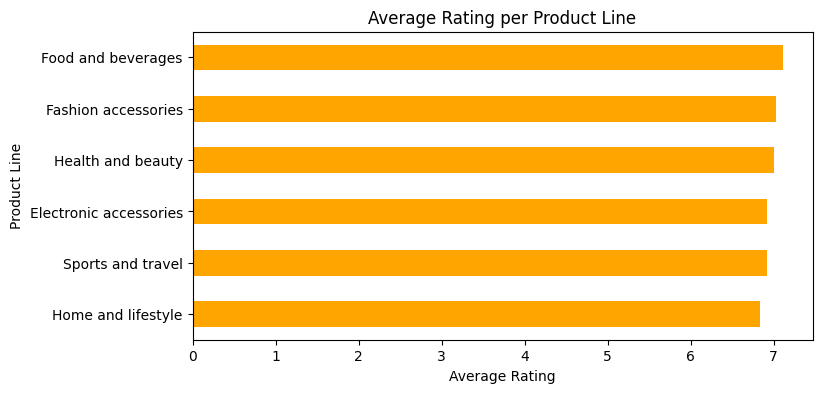

In [ ]:
plt.figure(figsize=(8,4))
data.groupby('Product line')['Rating'].mean().sort_values().plot(kind='barh', color='orange')
plt.title('Average Rating per Product Line')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.show()


يُوضح هذا التحليل متوسط تقييم العملاء لكل فئة من فئات المنتجات.
من خلال الرسم يمكن ملاحظة أي أنواع المنتجات نالت رضا العملاء الأعلى،
ويساعد ذلك في تقييم جودة المنتجات وتوجيه الاهتمام نحو الفئات التي تحقق تجربة أفضل للمستهلكين.

#مقارنة التقييم حسب نوع الزبون

/tmp/ipython-input-1778601477.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer type', y='Rating', data=data, palette='Set2')


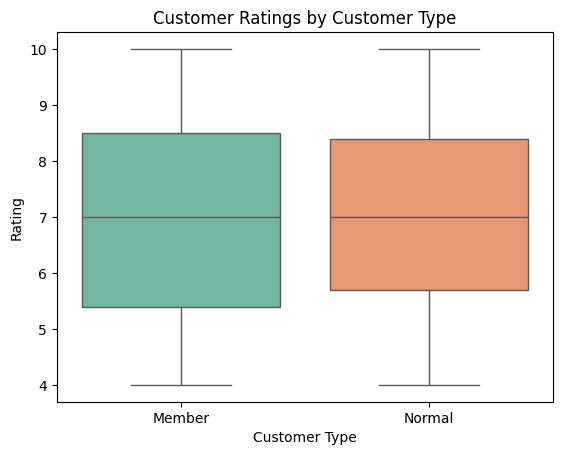

In [ ]:
sns.boxplot(x='Customer type', y='Rating', data=data, palette='Set2')
plt.title('Customer Ratings by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Rating')
plt.show()


يُوضّح هذا الرسم توزيع تقييمات العملاء حسب نوعهم (عضو Member أو عادي Normal).
يساعد التحليل في معرفة ما إذا كان الأعضاء أكثر رضا من العملاء العاديين،
ويمكن استخدامه لتقييم فعالية برامج الولاء وتحسين تجربة الزبائن.

#العلاقة بين المبيعات والتقييمات

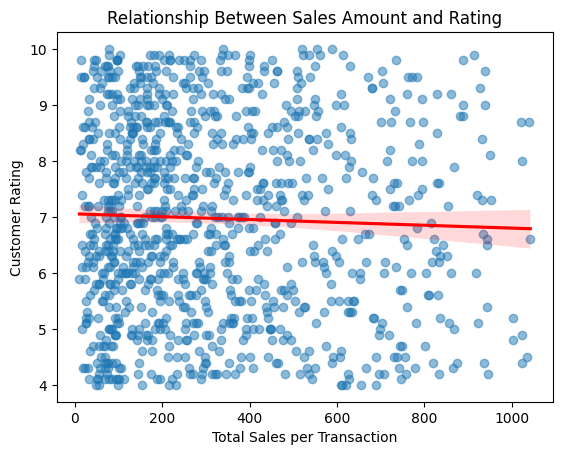

In [ ]:
sns.regplot(x='Total', y='Rating', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Sales Amount and Rating')
plt.xlabel('Total Sales per Transaction')
plt.ylabel('Customer Rating')
plt.show()


يُظهر هذا التحليل العلاقة بين إجمالي المبيعات لكل عملية وتقييم العميل.
من خلال الرسم نلاحظ أن العلاقة ضعيفة أو شبه منعدمة،
مما يشير إلى أن رضا العملاء لا يعتمد بشكل مباشر على قيمة الفاتورة،
بل ربما يتأثر أكثر بجودة الخدمة أو تجربة الشراء.

#اضافة عمود ساعات العمل الاضافية

In [ ]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
data['Extra_hours'] = data['Hour'].apply(lambda x: 'Extra' if (x < 8 or x > 17) else 'Normal')


في هذا الجزء تمت معالجة عمود الوقت Time لاستخراج الساعة من كل عملية بيع.
ثم تمت إضافة عمود جديد باسم Extra_hours لتصنيف الساعات إلى:

Normal (من 8 صباحًا إلى 5 مساءً)

Extra (قبل أو بعد أوقات الدوام)

يساعد هذا التصنيف في تحليل النشاط التجاري خارج أوقات العمل الرسمية ومعرفة مدى مساهمته في المبيعات.

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Weekday,Hour,Extra_hours
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,13,Normal
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,March,Friday,10,Normal
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,13,Normal
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,20,Extra
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,10,Normal


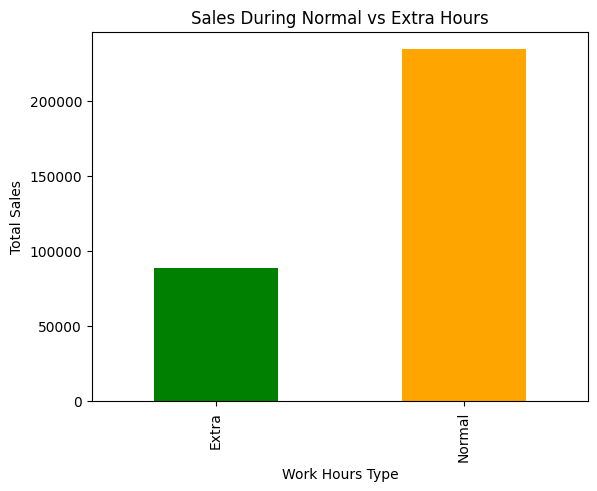

In [ ]:
sales_by_hour_type = data.groupby('Extra_hours')['Total'].sum()
sales_by_hour_type.plot(kind='bar', color=['green','orange'])
plt.title('Sales During Normal vs Extra Hours')
plt.xlabel('Work Hours Type')
plt.ylabel('Total Sales')
plt.show()


يُظهر هذا الرسم مقارنة بين إجمالي المبيعات خلال ساعات العمل العادية (Normal)
وساعات العمل الإضافية (Extra).
من خلال النتائج يمكن تحديد ما إذا كانت الفترات المسائية أو الصباحية المبكرة
تُساهم بشكل واضح في زيادة المبيعات،
وهو ما يساعد في اتخاذ قرارات تتعلق بتمديد ساعات الدوام أو توزيع الموظفين.

In [ ]:
profit_by_hours = data.groupby('Extra_hours')['gross income'].sum()


/tmp/ipython-input-2763300520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_hours.index, y=profit_by_hours.values, palette=['#2ECC71','#F39C12'])


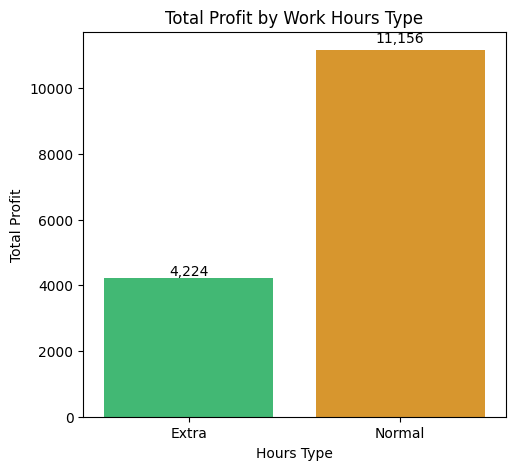

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=profit_by_hours.index, y=profit_by_hours.values, palette=['#2ECC71','#F39C12'])
plt.title('Total Profit by Work Hours Type')
plt.ylabel('Total Profit')
plt.xlabel('Hours Type')
for i, v in enumerate(profit_by_hours.values):
    plt.text(i, v + (v*0.02), f"{v:,.0f}", ha='center')


يُوضّح هذا الرسم إجمالي الأرباح حسب نوع ساعات العمل (عادية Normal مقابل إضافية Extra).
يساعد في تحليل تأثير فترات الدوام المختلفة على الربحية،
ومعرفة ما إذا كانت الساعات الإضافية تحقق أرباحًا أعلى تستحق الحفاظ عليها أو زيادتها.


In [ ]:
rating_by_hours = data.groupby('Extra_hours')['Rating'].mean()


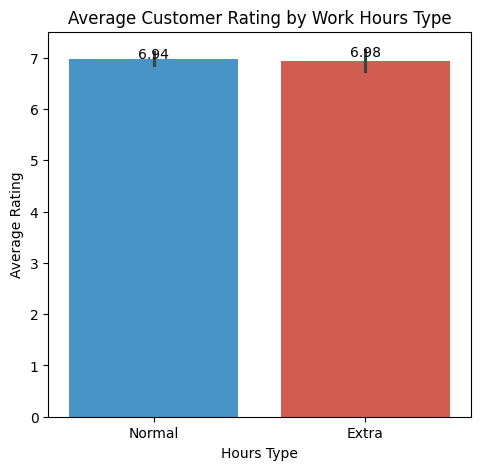

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.barplot(
    x='Extra_hours',
    y='Rating',
    data=data,
    hue='Extra_hours',
    palette=['#3498DB','#E74C3C'],
    legend=False
)
plt.title('Average Customer Rating by Work Hours Type')
plt.ylabel('Average Rating')
plt.xlabel('Hours Type')

rating_means = data.groupby('Extra_hours')['Rating'].mean()
for i, (h, v) in enumerate(rating_means.items()):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
plt.show()




يُوضح هذا الرسم متوسط تقييمات العملاء خلال ساعات العمل العادية (Normal)
مقارنة بالساعات الإضافية (Extra).
يساعد التحليل في معرفة ما إذا كانت جودة الخدمة ورضا العملاء
تختلف باختلاف فترات الدوام، مما يُفيد في تحسين إدارة الوقت وجدولة الموظفين.

#تحليل الارتباط

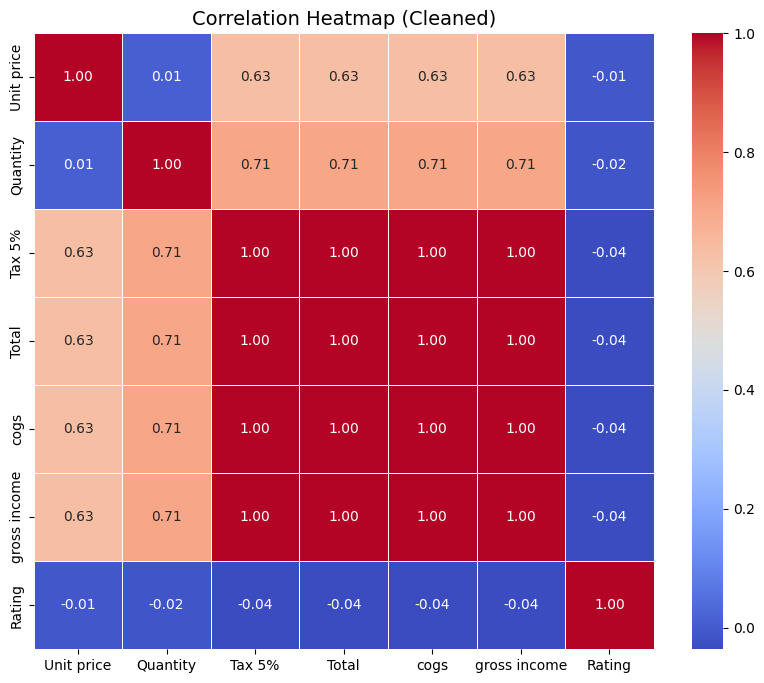

In [ ]:
numeric_data = data.select_dtypes(include=['int64','float64']).loc[:, data.nunique() > 1]

corr = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap (Cleaned)', fontsize=14)
plt.show()

# تحليل خريطة الارتباط الحرارية:
توضح هذه الخريطة الحرارية درجة الارتباط بين المتغيرات الرقمية بعد إزالة الأعمدة الثابتة (التي لا تحتوي على أي تباين في قيمها).

يُلاحظ ارتباط قوي جدًا بين أعمدة الإجمالي، والضريبة ٥٪، والدخل الإجمالي،
وهو أمر متوقع منطقيًا نظرًا لاعتماد كل من الضرائب والأرباح بشكل مباشر على إجمالي المبيعات.

مع ذلك، يُظهر متغير "التقييم" ارتباطًا ضعيفًا مع المتغيرات الأخرى،
مما يشير إلى أن رضا العملاء لا يتأثر بحجم المبيعات، بل بعوامل أخرى مثل جودة الخدمة أو تجربة التسوق.